In [4]:

import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the results
with open("../results/accuracy_results_mistral.json", "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()


,question,expected_answer,model_answer,cosine_similarity,bertscore_f1,hybrid_score
0,Who cannot be employed by a school in any manner?,those who refuse vetting,A person who is convicted of certain sex offen...,0.151,0.806,0.479
1,What did Paul Rose say Luther added to German ...,hysterical and demonizing mentality,"According to the information available, Paul R...",0.089,0.784,0.436
2,"In the layered model of the Earth, the outermo...",crust,The outermost layer of the Earth in the layere...,0.511,0.774,0.642
3,Who played quarterback for the Broncos after P...,Brock Osweiler,Trevor Siemian and Brock Osweiler were the pri...,0.478,0.814,0.646
4,Who leads the National and Public Library Serv...,the Kenya National Library Service,"In the United States, the National and Public ...",0.419,0.805,0.612


In [5]:

# Show basic statistics
summary = df[["cosine_similarity", "bertscore_f1", "hybrid_score"]].agg(['mean', 'std', 'min', 'max'])
summary


,cosine_similarity,bertscore_f1,hybrid_score
mean,0.302967,0.790767,0.546933
std,0.178182,0.025699,0.094529
min,0.000000,0.735000,0.385000
max,0.576000,0.860000,0.698000


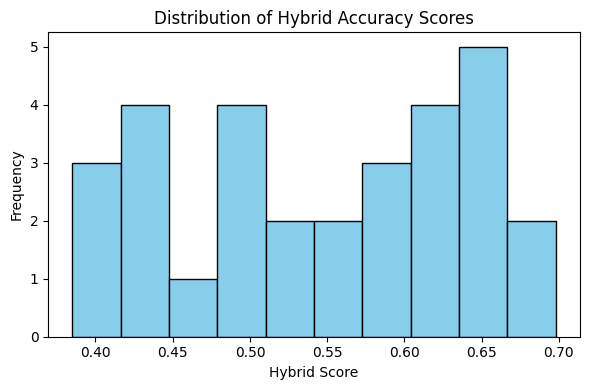

In [6]:

# Distribution of hybrid_score
plt.figure(figsize=(6, 4))
plt.hist(df["hybrid_score"], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Hybrid Accuracy Scores")
plt.xlabel("Hybrid Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [7]:

# Top 3 and Bottom 3 by hybrid_score
top3 = df.sort_values("hybrid_score", ascending=False).head(3)
bottom3 = df.sort_values("hybrid_score", ascending=True).head(3)

print("Top 3 Accuracy Examples:")
for idx, row in top3.iterrows():
    print(f"Hybrid Score: {row['hybrid_score']:.3f}")
    print(f"Question: {row['question']}")
    print(f"Expected: {row['expected_answer']}")
    print(f"Model: {row['model_answer'][:300]}...\n")

print("Bottom 3 Accuracy Examples:")
for idx, row in bottom3.iterrows():
    print(f"Hybrid Score: {row['hybrid_score']:.3f}")
    print(f"Question: {row['question']}")
    print(f"Expected: {row['expected_answer']}")
    print(f"Model: {row['model_answer'][:300]}...\n")


Top 3 Accuracy Examples:
Hybrid Score: 0.698
Question: What is another word for cryptophytes?
Expected: cryptomonads
Model: Cryptomonads or Cryptomicrobes can also refer to cryptophytes, which are a group of unicellular algae characterized by their unique, complex cell structure....

Hybrid Score: 0.690
Question: What did Paul Baran develop 
Expected: Paul Baran developed the concept Distributed Adaptive Message Block Switching
Model: Paul Baran developed packet switching, a fundamental concept in digital data communication. He is often recognized as one of the founding fathers of the internet along with Donald Davies and Leonard Kleinrock. Packet switching allows data to be broken into smaller chunks (packets) which are then sen...

Hybrid Score: 0.660
Question: What have peridinin-type chloroplasts lost?
Expected: the red algal endosymbiont's original cell membrane
Model: Peridinin-type chloroplasts, found in certain types of algae known as Peridinium, are unique because they have lo